# 8장. 추세 변경점 조절

## 추세 변경점 자동 탐지

### 기본(디폴트) 변경점 탐지(Default changepoint detection)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

df = pd.read_csv('/content/drive/MyDrive/Book7/data/divvy_daily.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [ ]:
import numpy as np

def set_changepoints(df, n_changepoints, changepoint_range):
    """Set changepoints
    Sets changepoints to the dates of changepoints. Either:
    1) We are generating a grid of them.
    2) The user prefers no changepoints be used.
    """
    df = df.sort_values('ds').reset_index(drop=True)
    # Place potential changepoints evenly through first
    # `changepoint_range` proportion of the history
    hist_size = int(np.floor(df.shape[0] * changepoint_range))
    if n_changepoints + 1 > hist_size:
        n_changepoints = hist_size - 1
        print('n_changepoints greater than number of observations. Using {}.'.format(n_changepoints))
    if n_changepoints > 0:
        cp_indexes = np.linspace(0,
                                 hist_size - 1,
                                 n_changepoints + 1).round().astype(np.int)
        changepoints = df.iloc[cp_indexes]['ds'].tail(-1)
    else:
        # set empty changepoints
        changepoints = pd.Series(pd.to_datetime([]), name='ds')
    return changepoints

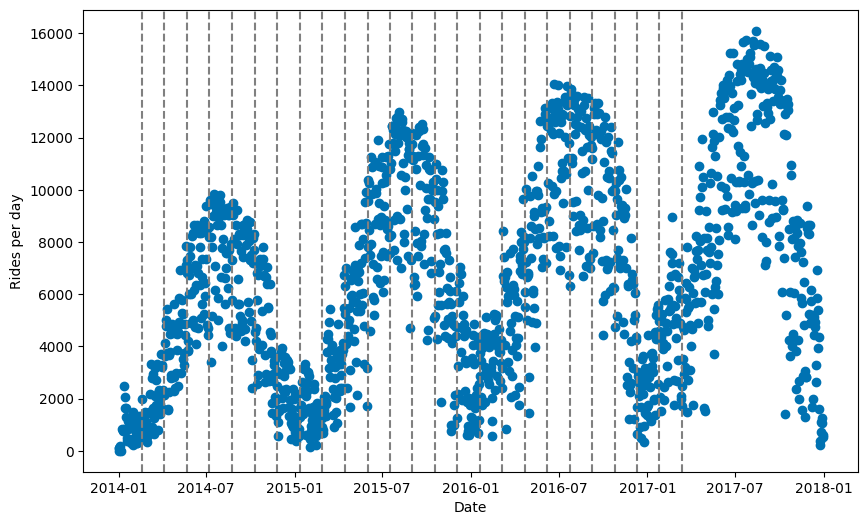

In [ ]:
### 역자 수정 코드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def set_changepoints(df, n_changepoints, changepoint_range):
    """Set changepoints
    Sets changepoints to the dates of changepoints. Either:
    1) We are generating a grid of them.
    2) The user prefers no changepoints be used.
    """
    df = df.sort_values('ds').reset_index(drop=True)
    # Place potential changepoints evenly through first
    # `changepoint_range` proportion of the history
    hist_size = int(np.floor(df.shape[0] * changepoint_range))

    if n_changepoints + 1 > hist_size:
        n_changepoints = hist_size - 1
        print('n_changepoints greater than number of observations. Using {}.'.format(n_changepoints))

    if n_changepoints > 0:
        cp_indexes = np.linspace(0,
                                 hist_size - 1,
                                 n_changepoints + 1).round().astype(int)  # np.int → int 변경
        changepoints = df.iloc[cp_indexes]['ds'].tail(-1)
    else:
        # set empty changepoints
        changepoints = pd.Series(pd.to_datetime([]), name='ds')

    return changepoints  # return 문 수정

"""
# 가상의 데이터프레임 생성 (예제 실행을 위한 코드)
df = pd.DataFrame({
    'ds': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'y': np.random.randint(50, 200, size=100)
})
"""

"""
changepoints = set_changepoints(df, 25, 0.8)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], c='#0072B2', label='Data')
for cp in changepoints:
    plt.axvline(x=cp, c='gray', ls='--', label='Changepoint' if cp == changepoints.iloc[0] else "")

plt.xlabel('Date')
plt.ylabel('Rides per day')
plt.legend()
plt.show()
"""
# 함수 실행
changepoints = set_changepoints(df, 25, 0.8)

plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], c='#0072B2')
for cp in changepoints:
    plt.axvline(x=cp, c='gray', ls='--')
plt.xlabel('Date')
plt.ylabel('Rides per day')
plt.show()


In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4)
model.fit(df)
forecast = model.predict()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9a5rm16/uhp0uzjt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9a5rm16/mp8pw85z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32929', 'data', 'file=/tmp/tmph9a5rm16/uhp0uzjt.json', 'init=/tmp/tmph9a5rm16/mp8pw85z.json', 'output', 'file=/tmp/tmph9a5rm16/prophet_modelra3cyfic/prophet_model-20250709120034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:00:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:00:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


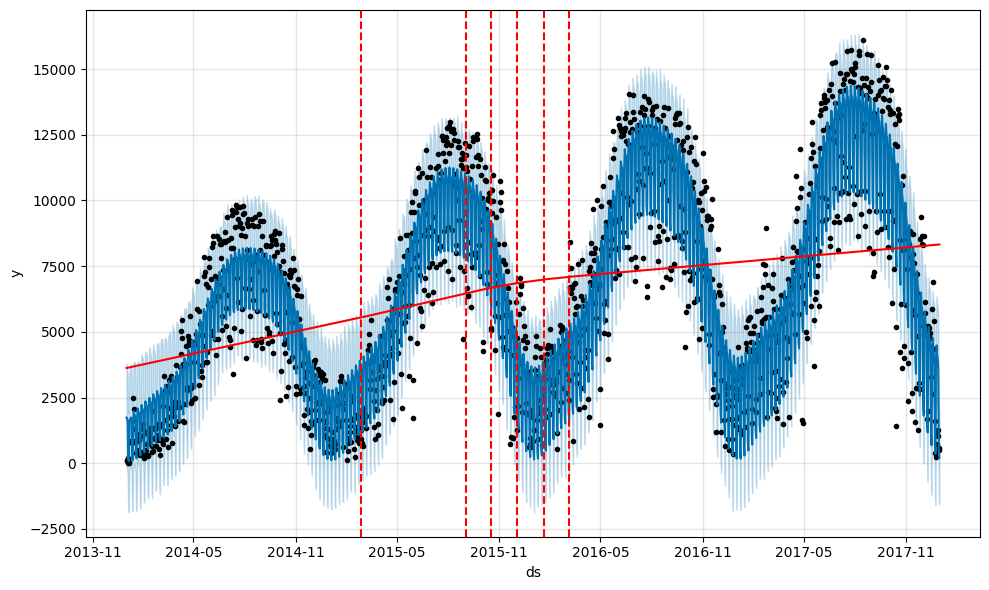

In [ ]:
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [ ]:
print(model.params['delta'])

[[ 2.79592e-08 -9.97401e-09 -8.39147e-10 -1.47431e-07  1.25546e-07
   2.07167e-08  1.46447e-07  2.37944e-05  2.90226e-02  3.26898e-06
   1.13852e-08 -9.49494e-08 -1.03066e-02 -9.18082e-02 -8.35057e-02
  -5.49021e-02 -3.43724e-02 -9.55178e-05 -8.22804e-08 -6.94642e-10
  -1.82087e-08  5.80475e-09  3.31089e-08  2.11582e-08  1.99484e-08]]


In [ ]:
ylims = fig.gca().get_ylim()

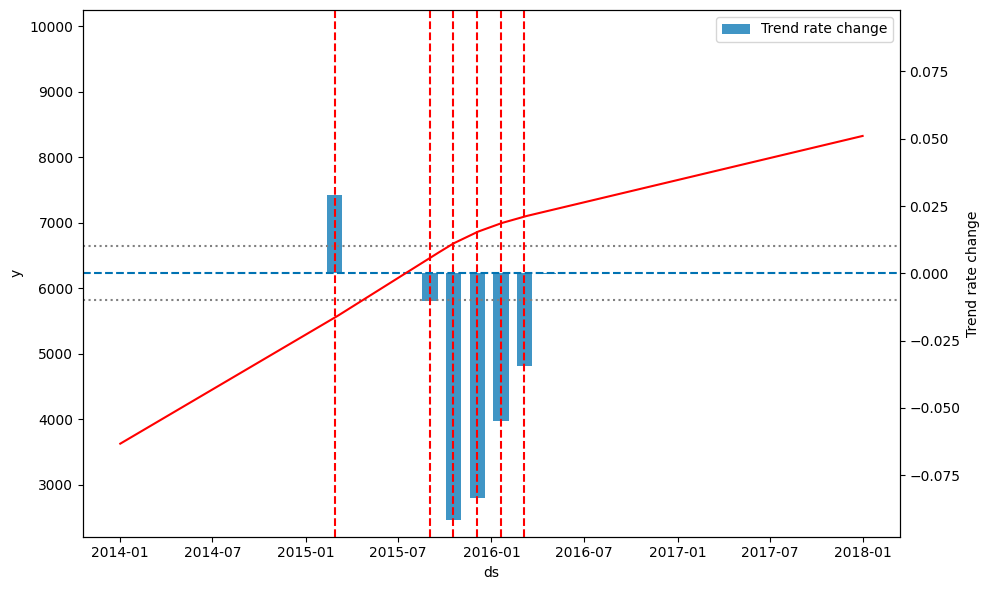

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'k'
add_changepoints_to_plot(ax1, model, forecast, trend=True)
ax1.set_xlabel('ds')
ax1.set_ylabel('y', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(ylims[0] + 5000, ylims[1] - 7000)
ax1.grid(False)

ax2 = ax1.twinx()

color = '#0072B2'
ax2.set_ylabel('Trend rate change')
ax2.bar(changepoints, model.params['delta'][0], width=30, color=color, alpha=.75, label='Trend rate change')
ax2.tick_params(axis='y', labelcolor='k')
ax2.axhline(y=0, c=color, ls='--')
ax2.axhline(y=.01, c='gray', ls=':')
ax2.axhline(y=-.01, c='gray', ls=':')
ax2.set_ylim(top=-ax2.get_ylim()[0], bottom=ax2.get_ylim()[0])

ax2.legend()

fig.tight_layout()
ax1.set_zorder(1)
ax1.patch.set_visible(False)
plt.show()

## 추세점 규제(Regularizing changepoints)

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                n_changepoints=5)

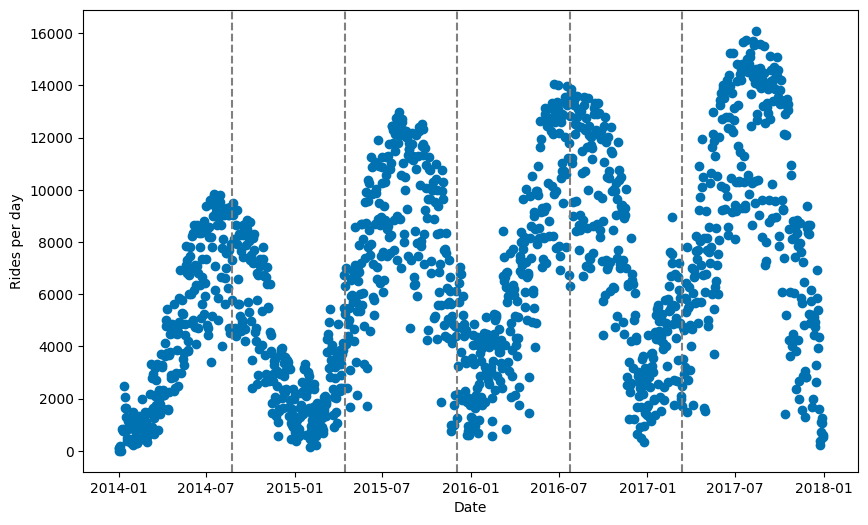

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], c='#0072B2')
for cp in set_changepoints(df, 5, 0.8):
    plt.axvline(x=cp, c='gray', ls='--')
plt.xlabel('Date')
plt.ylabel('Rides per day')
plt.show()

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoint_range=.5) # 5에서 0.5로 값 변경

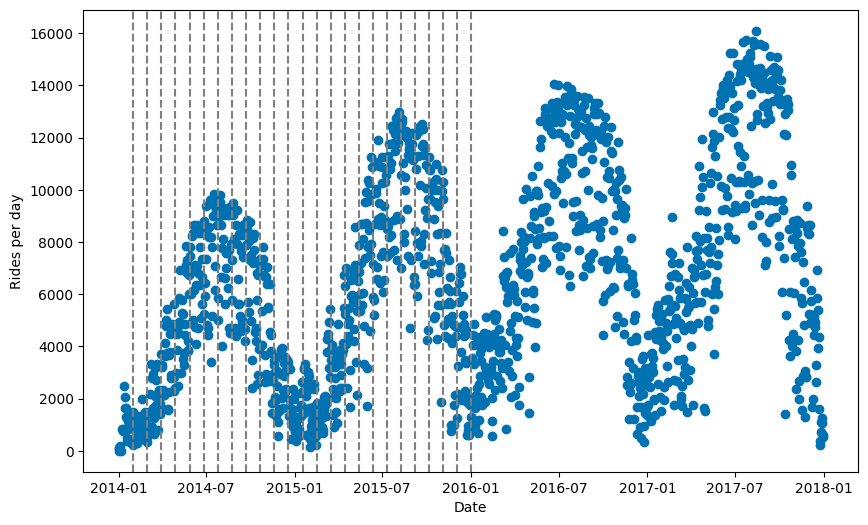

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'], c='#0072B2')
for cp in set_changepoints(df, 25, 0.5):
    plt.axvline(x=cp, c='gray', ls='--')
plt.xlabel('Date')
plt.ylabel('Rides per day')
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9a5rm16/3rn56mlx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9a5rm16/17j27lwh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79452', 'data', 'file=/tmp/tmph9a5rm16/3rn56mlx.json', 'init=/tmp/tmph9a5rm16/17j27lwh.json', 'output', 'file=/tmp/tmph9a5rm16/prophet_modelttoysa52/prophet_model-20250709120056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:00:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:00:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


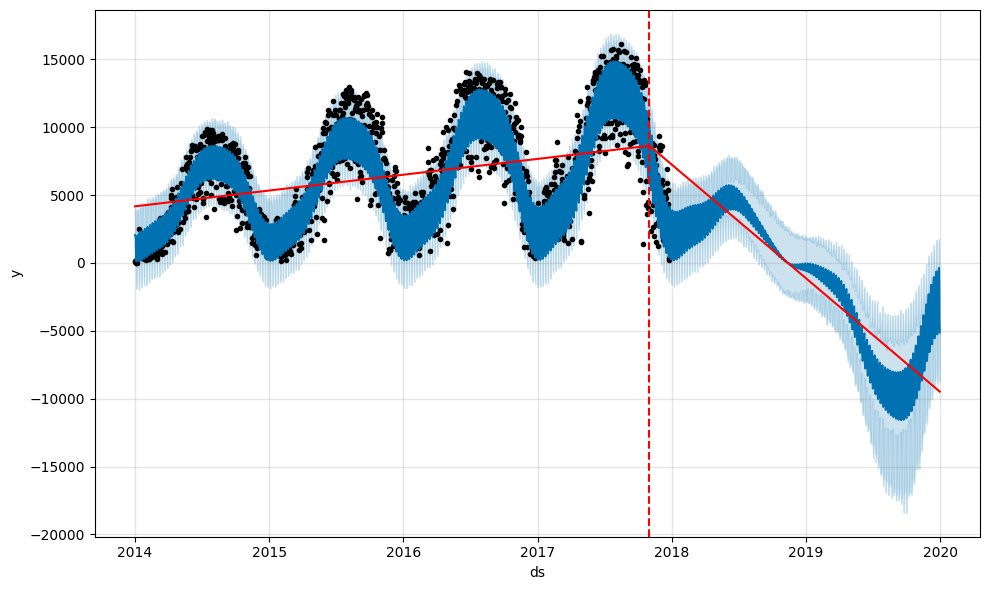

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoints=['2017-11-01'],
                changepoint_prior_scale=50)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9a5rm16/f5chx7y0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9a5rm16/tilrjp1a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31392', 'data', 'file=/tmp/tmph9a5rm16/f5chx7y0.json', 'init=/tmp/tmph9a5rm16/tilrjp1a.json', 'output', 'file=/tmp/tmph9a5rm16/prophet_model39c0rm10/prophet_model-20250709120100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


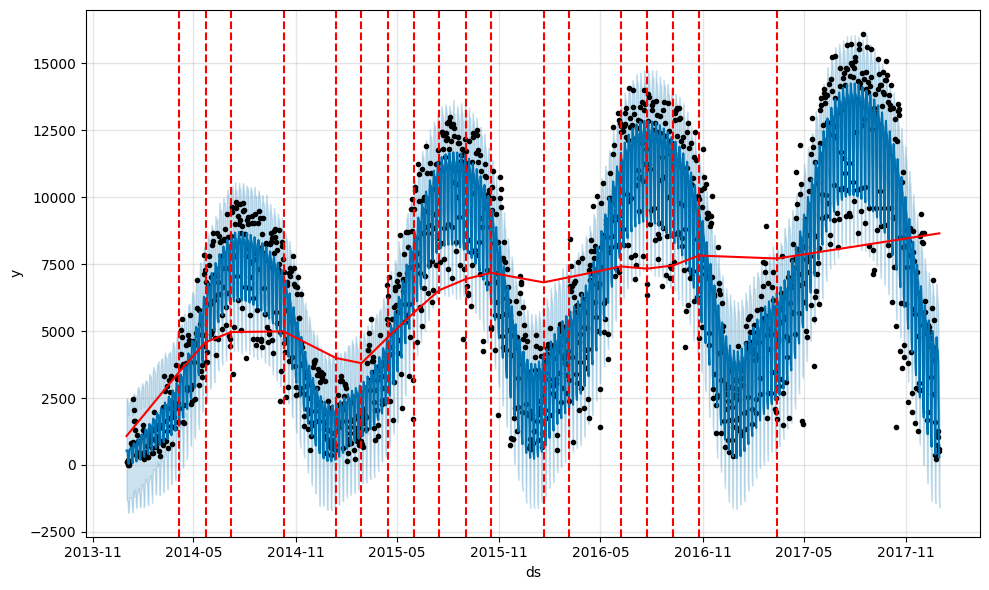

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoint_prior_scale=1)
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9a5rm16/f0it25nm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9a5rm16/720kaqb2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35407', 'data', 'file=/tmp/tmph9a5rm16/f0it25nm.json', 'init=/tmp/tmph9a5rm16/720kaqb2.json', 'output', 'file=/tmp/tmph9a5rm16/prophet_model57_op4v7/prophet_model-20250709120104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


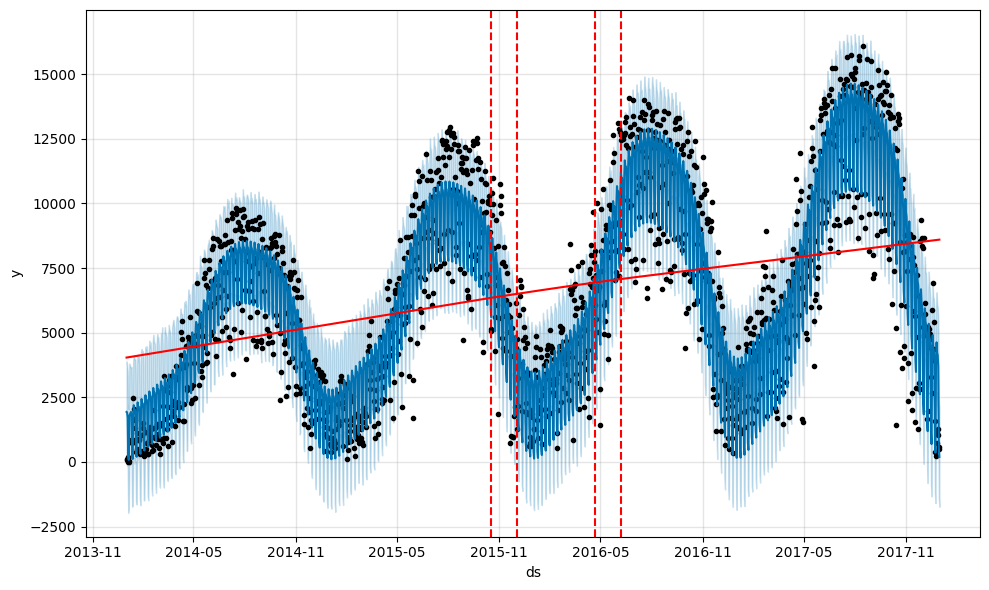

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                changepoint_prior_scale=.007) # 기본값 1에서 0.007로 변경
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

## 커스텀 변경점 위치 설정(Specifying custom changepoint locations)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Book7/data/instagram_jamesrodriguez10.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds', 'y']

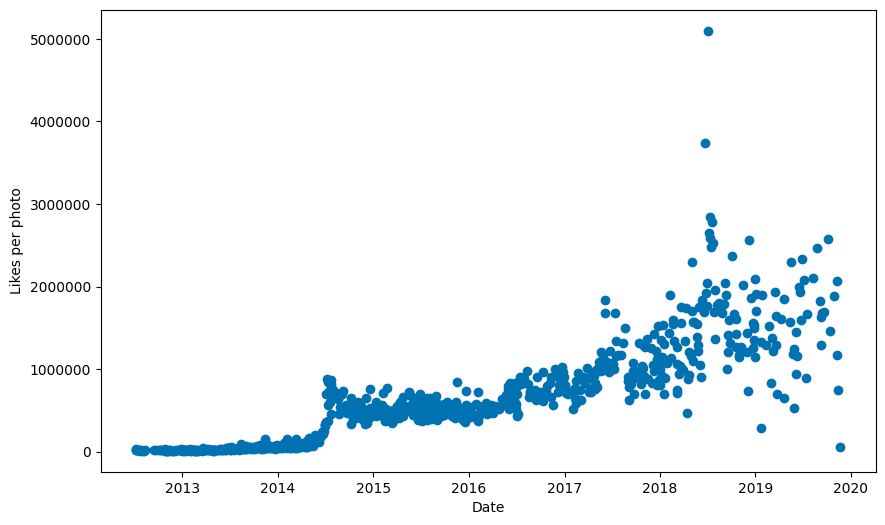

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

In [ ]:
wc_2014 = pd.DataFrame({'holiday': 'World Cup 2014',
                        'ds': pd.to_datetime(['2014-06-12']),
                        'lower_window': 0,
                        'upper_window': 31})
wc_2018 = pd.DataFrame({'holiday': 'World Cup 2018',
                        'ds': pd.to_datetime(['2018-06-14']),
                        'lower_window': 0,
                        'upper_window': 31})
signing = pd.DataFrame({'holiday': 'Bayern Munich',
                        'ds': pd.to_datetime(['2017-07-11']),
                        'lower_window': 0,
                        'upper_window': 14})

special_events = pd.concat([wc_2014, wc_2018, signing])

In [ ]:
changepoints = ['2014-06-12',
                '2014-07-13',
                '2017-07-11',
                '2017-07-31',
                '2018-06-14',
                '2018-07-15']

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                holidays=special_events,
                yearly_seasonality=False,
                weekly_seasonality=False,
                changepoint_prior_scale=1,
                changepoints=changepoints)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9a5rm16/qfdyeywj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9a5rm16/n3md2ws8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42767', 'data', 'file=/tmp/tmph9a5rm16/qfdyeywj.json', 'init=/tmp/tmph9a5rm16/n3md2ws8.json', 'output', 'file=/tmp/tmph9a5rm16/prophet_modelwzp3yp1w/prophet_model-20250709120121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


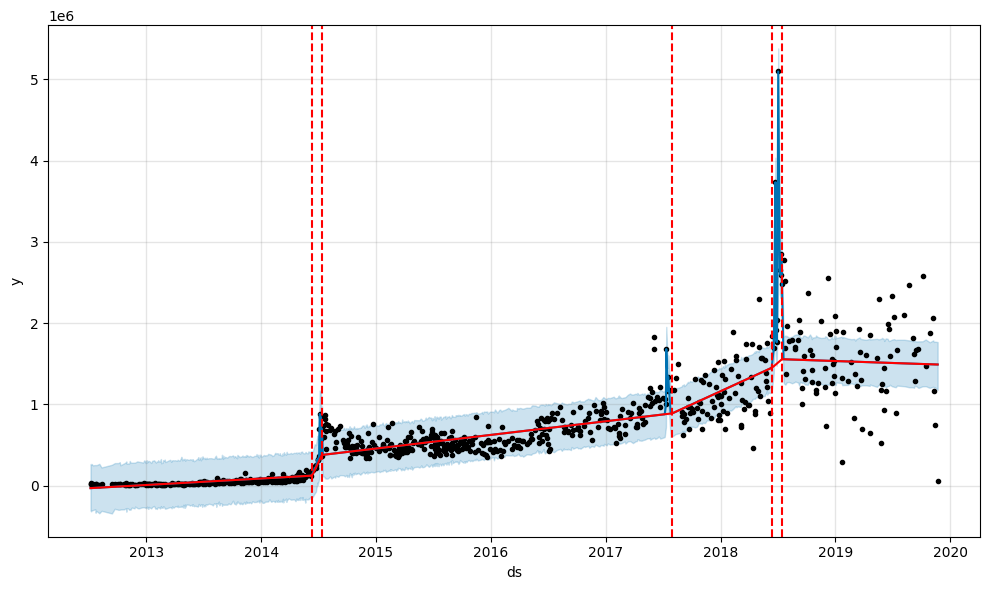

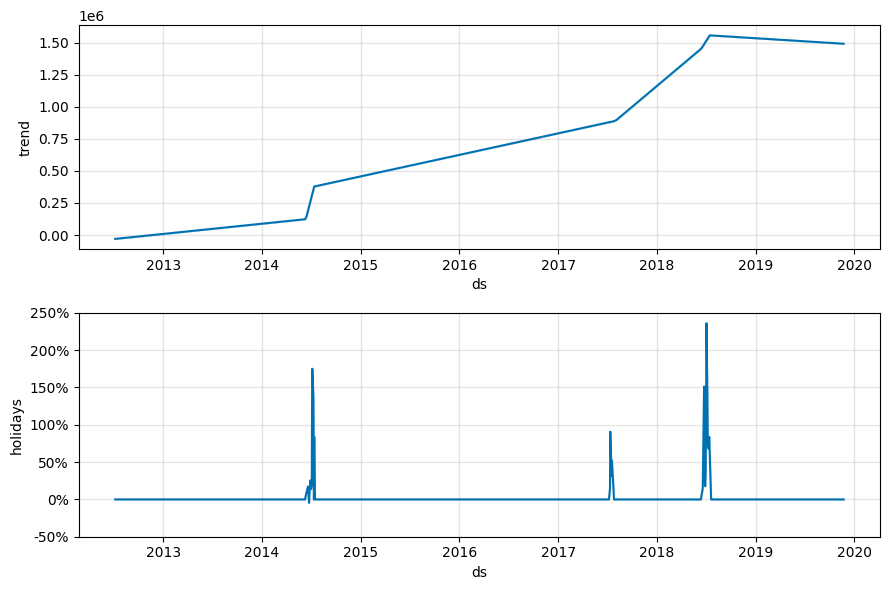

In [ ]:
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
### 이 코드 블록은 아래 블록의 코드로 대체
import numpy as np

def set_changepoints(df, n_changepoints=25, changepoint_range=.8):
    df = df.sort_values('ds').reset_index(drop=True)
    hist_size = int(np.floor(df.shape[0] * changepoint_range))
    if n_changepoints + 1 > hist_size:
        n_changepoints = hist_size - 1
        print('n_changepoints greater than number of '+
              'observations. Using {}.'.format(n_changepoints))
    if n_changepoints > 0:
        cp_indexes = (np.linspace(0,
                                  hist_size - 1,
                                  n_changepoints + 1).
                      round().astype(np.int))
        changepoints = df.iloc[cp_indexes]['ds'].tail(-1)
    else:
        # set empty changepoints
        changepoints = pd.Series(pd.to_datetime([]), name='ds')
    return changepoints

In [ ]:
### 역자 수정 코드
import numpy as np
import pandas as pd

def set_changepoints(df, n_changepoints=25, changepoint_range=.8):
    df = df.sort_values('ds').reset_index(drop=True)
    hist_size = int(np.floor(df.shape[0] * changepoint_range))

    if n_changepoints + 1 > hist_size:
        n_changepoints = hist_size - 1
        print(f'n_changepoints greater than number of observations. Using {n_changepoints}.')

    if n_changepoints > 0:
        cp_indexes = np.linspace(
            0, hist_size - 1, n_changepoints + 1).round().astype(int)
        # np.int → int 변경
        changepoints = df.iloc[cp_indexes]['ds'].tail(-1)
    else:
        # 비어 있는 changepoints 생성
        changepoints = pd.Series(pd.to_datetime([]), name='ds')

    return changepoints



In [ ]:
changepoints = set_changepoints(df, 5, .8)
new_changepoints = pd.Series(pd.to_datetime(['2014-05-02',
                                             '2014-08-25',
                                             '2017-07-31',
                                             '2018-06-14',
                                             '2018-06-04',
                                             '2018-07-03']))
changepoints = pd.concat([changepoints, new_changepoints])
changepoints = changepoints.sort_values().reset_index(drop=True)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9a5rm16/z4zdmbne.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph9a5rm16/_2v0vo8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83165', 'data', 'file=/tmp/tmph9a5rm16/z4zdmbne.json', 'init=/tmp/tmph9a5rm16/_2v0vo8m.json', 'output', 'file=/tmp/tmph9a5rm16/prophet_modelgj2fxq9l/prophet_model-20250709120135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


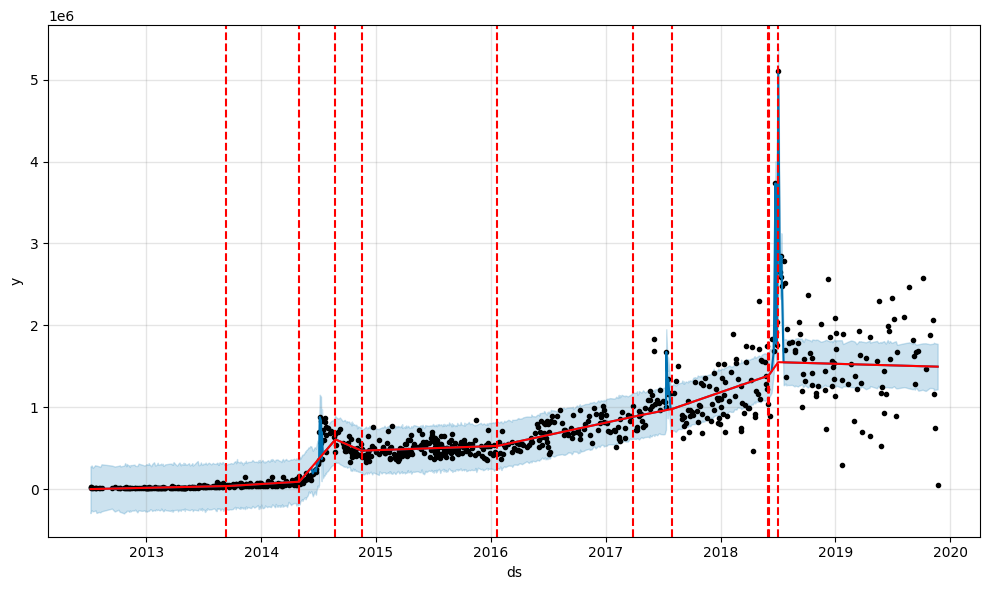

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                holidays=special_events,
                yearly_seasonality=False,
                weekly_seasonality=False,
                changepoint_prior_scale=1,
                changepoints=changepoints)
model.fit(df)
forecast = model.predict()
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()